# Load Graphs 

In [1]:
import pickle
with open('mm-mm-weighted.pickle', 'rb') as f:
    mmlist = pickle.load(f)

In [2]:
import networkx as nx
G1=nx.Graph()
for i in range(len(mmlist)):
    if G1.has_node(mmlist[i][0])==False:
        G1.add_node(mmlist[i][0])
    if G1.has_node(mmlist[i][1])==False:
        G1.add_node(mmlist[i][1])
    G1.add_edge(mmlist[i][0],mmlist[i][1],weight=mmlist[i][2])
G1

In [3]:
G1.number_of_nodes()

623

In [4]:
G1.number_of_edges()

1760

In [5]:
len(G1)

623

In [6]:
G2=nx.Graph()
G2=G1
G2

In [7]:
print('len G1:', len(G1))

print('len G2:',len(G2))

len G1: 623
len G2: 623


# Swap graphs if len G1 > len G2

In [8]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

623
623


In [9]:
ed1=G1.edges()

In [10]:
nd1=G1.nodes()

In [11]:
ed2=G2.edges()

In [12]:
len(ed2)

1760

In [13]:
nd2=G2.nodes()

In [14]:
len(ed1)

1760

In [15]:
len(nd1)

623

In [16]:
el1=list(ed1)
el2=list(ed2)

In [17]:
nd1=list(nd1)
nd2=list(nd2)

In [18]:
degG1 = [val for (node, val) in G1.degree()]


In [19]:
degG2 = [val for (node, val) in G2.degree()]

# Define Target Graph

In [20]:
G_target_na=nx.read_weighted_edgelist('mm-mm.evals')
G_target_na  

In [21]:
gtnode=list(G_target_na.nodes())
print(len(gtnode))
g_t_node=[]
for i in range(len(gtnode)):
    if (G1.has_node(gtnode[i])==False and G2.has_node(gtnode[i])==False):
        continue
    else:
        g_t_node.append(gtnode[i])

#print(gtnode)
print(len(g_t_node))

24267
623


In [39]:
G_target=nx.Graph()
for i in range(len(g_t_node)):
    for j in range(len(g_t_node)):
        if G_target_na.has_node(g_t_node[i])==False:
            G_target.add_node(g_t_node[i])
        if G_target_na.has_node(g_t_node[j])==False:
            G_target.add_node(g_t_node[j])
        if G_target_na.has_edge(g_t_node[i],g_t_node[j]):
            a=list(G_target_na.get_edge_data(g_t_node[i],g_t_node[j]).values())
            if len(a)>1:
                b=list(a[0][0].values())
            else:
                b=a[0]
            if(type(b)==list):
                weight=b[0]
            else:
                weight=b
            G_target.add_edge(g_t_node[i],g_t_node[j],weight=weight)
            
G_target

In [33]:
type(a)

list

In [40]:
len(G_target)

623

In [41]:
G_target_na=G_target

In [42]:
G_target_na.edges()

EdgeView([('mm8699', 'mm8699'), ('mm8699', 'mm14063'), ('mm8699', 'mm11243'), ('mm8699', 'mm2123'), ('mm8699', 'mm2153'), ('mm8699', 'mm6374'), ('mm8699', 'mm3821'), ('mm8699', 'mm7887'), ('mm8699', 'mm8967'), ('mm8699', 'mm2895'), ('mm8699', 'mm1347'), ('mm8699', 'mm4294'), ('mm8699', 'mm11480'), ('mm8699', 'mm5183'), ('mm8699', 'mm5034'), ('mm8699', 'mm6549'), ('mm8699', 'mm592'), ('mm8699', 'mm5688'), ('mm8699', 'mm1150'), ('mm8699', 'mm14346'), ('mm8699', 'mm2301'), ('mm8699', 'mm7826'), ('mm8699', 'mm6126'), ('mm14063', 'mm14063'), ('mm14063', 'mm11243'), ('mm14063', 'mm2123'), ('mm14063', 'mm7887'), ('mm14063', 'mm8967'), ('mm14063', 'mm5183'), ('mm14063', 'mm592'), ('mm14063', 'mm1150'), ('mm14063', 'mm14346'), ('mm14063', 'mm6126'), ('mm14063', 'mm9407'), ('mm14063', 'mm11666'), ('mm11243', 'mm11243'), ('mm11243', 'mm7887'), ('mm11243', 'mm2895'), ('mm11243', 'mm5183'), ('mm11243', 'mm1150'), ('mm11243', 'mm14346'), ('mm11243', 'mm6126'), ('mm11243', 'mm1953'), ('mm11243', 'mm6

In [43]:
print(G_target_na.get_edge_data('mm8699', 'sc1286'))

None


# Compute Score for create similarity matrix
برای ساخت هسته اولیه جهت تولید جمعیت بایدامتیاز اولیه و ماتریس شباهت را بسازیم. این امتیازات را بر اساس پیج رنک، میزان تفاوت درجات رئوس در دو گراف، ضریب یال ورودی، تفاوت بین ضرایب یال های دو گراف و خوشه بندی آنها و شباهت توالی (امتیاز بلست) می سازیم که برگرفته از مقاله می-الاین است 

In [44]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [45]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [46]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [47]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node
    

In [48]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [49]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [50]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
            if q1==None:
                c=0
            else:
                c=list(q1.values())
                c=c[0]
            seq[i][j]=c    
            
    return seq

In [51]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s

In [52]:
import numpy as np
m=compute_score(G1,G2)
n=m


# multi tasking for initial population

In [53]:
def task1(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task1')
    for z1 in range(int(len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
  

In [54]:
def task2(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task2')
    for z1 in range(int(len_G1/3),int(2*len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

In [55]:
def task3(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task3')
    for z1 in range(int(2*len_G1/3),len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

# multi processing for speed up

In [56]:
def fun_rand_permute(len_G1, base_permute, rand_permutation):
    for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)
    #print(rand_permutation)

# Initialization such as MeAlign

In [57]:
#%%prun
import random
import threading

len_pop=300 
len_G1=len(G1)
len_G2=len(G2)
similarity_score_matrix=np.zeros((len_G1,len_G1))
sim_score_matrix=np.zeros((len_G1,len_G1))
pop=np.zeros((len_pop,len_G1,2))
index_score=np.zeros(len_G1)
rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]

for i in range(len_pop):  
    print('wait')
    if i>0:
        do_not_permute = set(base_permute)-set(index_score)#[item for item in base_permute if item not in index_score]
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
     
    t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
    t.start() 
    t.join()
    #print(rand_permutation)
    
    """for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1) """               
    print('in for loop')
    """for z1 in range(len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])"""
     
    
      
    t1 = threading.Thread(target=task1, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,)) 
    t2 = threading.Thread(target=task2, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    t3 = threading.Thread(target=task3, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
    # starting thread 3 
    t3.start() 
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
    # wait until thread 3 is completely executed 
    t3.join()
    # both threads completely executed 
    print("Done!, i=",i) 
    
pop

wait
in for loop
task1
task2
task3
Done!, i= 0
wait
in for loop
task1
task2
task3
Done!, i= 1
wait
in for loop
task1
task2
task3
Done!, i= 2
wait
in for loop
task1
task2
task3
Done!, i= 3
wait
in for loop
task1
task2
task3
Done!, i= 4
wait
in for loop
task1
task2
task3
Done!, i= 5
wait
in for loop
task1
task2
task3
Done!, i= 6
wait
in for loop
task1
task2
task3
Done!, i= 7
wait
in for loop
task1
task2
task3
Done!, i= 8
wait
in for loop
task1
task2
task3
Done!, i= 9
wait
in for loop
task1
task2
task3
Done!, i= 10
wait
in for loop
task1
task2
task3
Done!, i= 11
wait
in for loop
task1
task2
task3
Done!, i= 12
wait
in for loop
task1
task2
task3
Done!, i= 13
wait
in for loop
task1
task2
task3
Done!, i= 14
wait
in for loop
task1
task2
task3
Done!, i= 15
wait
in for loop
task1
task2
task3
Done!, i= 16
wait
in for loop
task1
task2
task3
Done!, i= 17
wait
in for loop
task1
task2
task3
Done!, i= 18
wait
in for loop
task1
task2
task3
Done!, i= 19
wait
in for loop
task1
task2
task3
Done!, i= 20
wa

Done!, i= 169
wait
in for loop
task1
task2
task3
Done!, i= 170
wait
in for loop
task1
task2
task3
Done!, i= 171
wait
in for loop
task1
task2
task3
Done!, i= 172
wait
in for loop
task1
task2
task3
Done!, i= 173
wait
in for loop
task1
task2
task3
Done!, i= 174
wait
in for loop
task1
task2
task3
Done!, i= 175
wait
in for loop
task1
task2
task3
Done!, i= 176
wait
in for loop
task1
task2
task3
Done!, i= 177
wait
in for loop
task1
task2
task3
Done!, i= 178
wait
in for loop
task1
task2
task3
Done!, i= 179
wait
in for loop
task1
task2
task3
Done!, i= 180
wait
in for loop
task1
task2
task3
Done!, i= 181
wait
in for loop
task1
task2
task3
Done!, i= 182
wait
in for loop
task1
task2
task3
Done!, i= 183
wait
in for loop
task1
task2
task3
Done!, i= 184
wait
in for loop
task1
task2
task3
Done!, i= 185
wait
in for loop
task1
task2
task3
Done!, i= 186
wait
in for loop
task1
task2
task3
Done!, i= 187
wait
in for loop
task1
task2
task3
Done!, i= 188
wait
in for loop
task1
task2
task3
Done!, i= 189
wait
i

array([[[  0.,   0.],
        [  1.,   1.],
        [  2.,   2.],
        ...,
        [620., 620.],
        [621., 621.],
        [622., 622.]],

       [[  0., 193.],
        [  1., 348.],
        [  2., 468.],
        ...,
        [620., 620.],
        [621., 621.],
        [622., 502.]],

       [[  0., 406.],
        [  1., 194.],
        [  2.,   2.],
        ...,
        [620., 620.],
        [621., 621.],
        [622., 622.]],

       ...,

       [[  0., 587.],
        [  1., 432.],
        [  2.,   2.],
        ...,
        [620., 620.],
        [621., 621.],
        [622., 622.]],

       [[  0., 303.],
        [  1., 568.],
        [  2.,   2.],
        ...,
        [620., 620.],
        [621., 621.],
        [622., 622.]],

       [[  0., 503.],
        [  1.,   1.],
        [  2., 257.],
        ...,
        [620., 451.],
        [621.,  32.],
        [622., 573.]]])

# Save population

In [58]:
import pickle
with open('mm-mm-base_permute.pickle', 'wb') as f:
    pickle.dump(base_permute, f)

In [59]:
import pickle
with open('mm-mm-pop.pickle', 'wb') as f:
    pickle.dump(pop, f)

# Load population

In [ ]:
with open('mm-mm-base_permute', 'rb') as f:
    base_permute = pickle.load(f)

In [ ]:
with open('mm-mm-pop.pickle', 'rb') as f:
    pop = pickle.load(f)

# compute measure edge correctness, ics, nc and s3

In [60]:
def induced_function_for_initialpop(sub_pop):
    num_induced=0
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    for i in range(len(sub_g2)):
        for j in range(i,len(sub_g2)):
            if G2.has_edge(nd2[int(sub_g2[i])], nd2[int(sub_g2[j])]):
                num_induced=num_induced+1
    return num_induced

In [61]:
score_ec=np.zeros(len_pop)
score_ics=np.zeros(len_pop)
score_s3=np.zeros(len_pop)
score_nc=np.zeros(len_pop)
num_seq=np.zeros(len_pop)
score_ncorectness=np.zeros(len_pop)

p=pop 
len_G1=len(G1)
map_items=[] #np.zeros((len_pop,len_G1,2))

for i in range(len(p)):
    ec=0
    nc=0
    sub_pop=p[i]
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    num_induced=induced_function_for_initialpop(sub_pop) 
    #print("number induced for i=",i," is: ",num_induced)
    
    for j in range(len_G1):                           
         if G_target_na.has_edge(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]):
            num_seq[i]+=1  # create sequence matrix 
            map_items.append([nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]])
            ec=ec+1            
            nc=nc+2
                 
    score_ec[i]=ec/G1.number_of_edges()*100
    score_ics[i]=ec/num_induced*100
    score_s3[i]=ec/(G1.number_of_edges()+num_induced-ec)*100
    score_nc[i]=nc/G1.number_of_nodes()*100 
    score_ncorectness[i]=(nc/G_target_na.number_of_nodes())*100
    """if (score_nc[i] > 100):
        score_nc[i]=100
    if (score_ec[i] > 100):
        score_ec[i]=100
    if (score_ics[i] > 100):
        score_ics[i]=100
    if (score_s3[i] > 100):
        score_s3[i]=100
    if ( score_ncorectness[i]>100):
         score_ncorectness[i]=100"""

print('ec')
print(score_ec)
print('ics')
print(score_ics)
print('s3')
print(score_s3)
print('nc',score_nc)
print('node correctness: ',  score_ncorectness)

ec
[35.39772727 31.93181818 30.85227273 30.73863636 29.375      29.82954545
 30.39772727 29.65909091 30.17045455 31.02272727 29.88636364 29.77272727
 30.39772727 29.82954545 29.65909091 30.28409091 29.94318182 30.39772727
 29.71590909 29.60227273 29.48863636 29.65909091 29.77272727 30.11363636
 30.05681818 29.14772727 29.54545455 29.375      29.14772727 29.77272727
 29.03409091 28.80681818 30.39772727 30.34090909 30.51136364 30.17045455
 29.48863636 29.48863636 29.94318182 29.77272727 30.17045455 29.71590909
 29.71590909 30.05681818 30.625      29.43181818 28.63636364 30.90909091
 29.375      30.34090909 29.31818182 29.20454545 30.11363636 29.43181818
 30.05681818 29.71590909 30.34090909 29.77272727 30.17045455 30.39772727
 30.28409091 30.05681818 29.88636364 29.14772727 30.17045455 29.88636364
 30.11363636 30.96590909 29.43181818 29.31818182 28.69318182 28.97727273
 29.94318182 29.65909091 30.         29.26136364 29.20454545 30.11363636
 29.71590909 30.51136364 30.51136364 29.26136364

## number of matched sequences 

In [62]:
num_seq

array([623., 562., 543., 541., 517., 525., 535., 522., 531., 546., 526.,
       524., 535., 525., 522., 533., 527., 535., 523., 521., 519., 522.,
       524., 530., 529., 513., 520., 517., 513., 524., 511., 507., 535.,
       534., 537., 531., 519., 519., 527., 524., 531., 523., 523., 529.,
       539., 518., 504., 544., 517., 534., 516., 514., 530., 518., 529.,
       523., 534., 524., 531., 535., 533., 529., 526., 513., 531., 526.,
       530., 545., 518., 516., 505., 510., 527., 522., 528., 515., 514.,
       530., 523., 537., 537., 515., 527., 529., 523., 527., 518., 551.,
       517., 527., 530., 532., 533., 516., 535., 528., 522., 526., 525.,
       541., 530., 512., 532., 509., 538., 523., 509., 512., 528., 523.,
       527., 531., 518., 526., 525., 523., 507., 529., 523., 527., 535.,
       529., 517., 534., 540., 529., 533., 528., 523., 513., 514., 531.,
       538., 526., 518., 516., 522., 532., 521., 536., 537., 531., 523.,
       527., 521., 517., 543., 529., 536., 527., 53

## compute topology score

In [63]:
#compute Final Score
tscore=np.zeros(len_pop)
for i in range(len(p)):
    tscore[i]=(0.25*(score_ec[i]/G1.number_of_edges())+0.25*(score_s3[i]/(G1.number_of_edges()+score_ics[i]-score_ec[i]))+0.25*(score_ics[i]/2*G1.number_of_edges())+0.25*(score_nc[i]/(G1.number_of_nodes()+G2.number_of_nodes())))
print(tscore)

[ 7787.54821119 10126.17013508 10405.965934    9684.33850435
 10265.38352695 10017.38720224 10129.12971337 10038.50245909
 10411.80637129 11030.34593712 10080.18060708 10076.96415683
 11167.02499666  9763.35472152 10064.89631431 10340.42981667
 10269.30617374 10388.39148493 10989.53491569  9906.69596779
 10051.09702953 10064.89631431  9819.46182699 10282.2285193
 10580.04153406  9891.36360827 10612.28574181  9873.30440177
 10306.88957894  9582.7509007  11000.04019703 11416.62130774
 10379.23068161 10989.75198361 10858.49807107 10338.09475258
  9989.5419953  10582.06115199 10278.41013319 10366.94759463
 11073.02753508 10040.18061386  9987.88821268 10608.97499281
 10578.09761274  9600.71451879  9309.86311177 10273.00402032
 10560.85769012 11339.81035875 10424.28293489  9807.4990761
 10466.82795134  9841.1459393  10226.75501823 10683.42084329
 10699.49548777 10508.70112062 10678.28667409  9800.20841346
 10767.71863548 11743.73491981 10845.40216214 10250.72145535
 11200.42527838 10387.8330

# Compute Topology and Sequence score

In [64]:
# Final Score
score=np.zeros(len_pop)
alpha=0.5
for i in range (len(p)):
    score[i]=alpha*tscore[i]+(1-alpha)*num_seq[i]   
score

array([4205.27410559, 5344.08506754, 5474.482967  , 5112.66925217,
       5391.19176347, 5271.19360112, 5332.06485668, 5280.25122954,
       5471.40318565, 5788.17296856, 5303.09030354, 5300.48207841,
       5851.01249833, 5144.17736076, 5293.44815716, 5436.71490834,
       5398.15308687, 5461.69574247, 5756.26745785, 5213.84798389,
       5285.04851477, 5293.44815716, 5171.73091349, 5406.11425965,
       5554.52076703, 5202.18180414, 5566.14287091, 5195.15220088,
       5409.94478947, 5053.37545035, 5755.52009851, 5961.81065387,
       5457.11534081, 5761.8759918 , 5697.74903553, 5434.54737629,
       5254.27099765, 5550.53057599, 5402.70506659, 5445.47379732,
       5802.01376754, 5281.59030693, 5255.44410634, 5568.98749641,
       5558.54880637, 5059.3572594 , 4906.93155589, 5408.50201016,
       5538.92884506, 5936.90517937, 5470.14146745, 5160.74953805,
       5498.41397567, 5179.57296965, 5377.87750911, 5603.21042164,
       5616.74774389, 5516.35056031, 5604.64333705, 5167.60420

## Define function for fitness and compute final score

In [65]:
def induced_function_for_pop(wpop):
    counter_induced=0
    subg=list(set([wpop[i][1] for i in range(len_G1)]))
    for i in range(len(subg)):
        for j in range(i,len(subg)):
            if G2.has_edge(nd2[int(subg[i])], nd2[int(subg[j])]):
                counter_induced=counter_induced+1
    #print("con: ",counter_induced)
    return counter_induced

In [66]:
def Fitness(wpop,counter_induced):
    ec_temp=0
    nc_temp=0
    num_seq_temp=0
    score_ncorectness=0
    
  
    for j in range(len_G1):        
        x1=int(wpop[j][0])
        x2=int(wpop[j][1])
        if G_target_na.has_edge(nd1[x1],nd2[x2]):
            num_seq_temp+=1              
            ec_temp=ec_temp+1            
            nc_temp=nc_temp+2
                 
    score_ec_temp=ec_temp/G1.number_of_edges()*100
    score_ics_temp=ec_temp/counter_induced*100
    score_s3_temp=ec_temp/(G1.number_of_edges()+counter_induced-ec_temp)*100
    score_nc_temp=nc_temp/G1.number_of_nodes()*100
    score_ncorectness=(nc_temp/G_target_na.number_of_nodes())*100
    """if (score_nc_temp > 100):
        score_nc_temp=100
    if (score_ec_temp > 100):
        score_ec_temp=100
    if (score_ics_temp > 100):
        score_ics_temp=100
    if (score_s3_temp > 100):
        score_s3_temp=100
    if ( score_ncorectness>100):
         score_ncorectness=100"""
    # local measures
    pre=ec_temp/G_target_na.number_of_edges()*100
    rec=ec_temp/len(wpop)*100
    fsc=2*((pre*rec)/(pre+rec))
    
    if (GbestFlag==True):
        print('ec')
        print(score_ec_temp)
        print('ics')
        print(score_ics_temp)
        print('s3')
        print(score_s3_temp)
        print('nc',score_nc_temp)
        print('num_seq',num_seq_temp)
        print('precision: ',pre)
        print('Recall: ',rec)
        print('F-score: ',fsc)

    alpha=0.5
    tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
    score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
    print('score:',score_temp)
    
    return score_temp,pre,rec,fsc


# Hybrid SFLA-CSO proposed method

In [67]:
# Implementation of Hybrid SFLA-CSO Algorithm
import random
from operator import itemgetter
from random import shuffle
import concurrent.futures

precision=np.zeros(len_pop)
recall=np.zeros(len_pop)
fscore=np.zeros(len_pop)

dim=len_G1
new_pop=p.tolist()
[new_pop[i].append(score[i]) for i in range(len_pop)]
#[print(new_pop[i][dim]) for i in range(len_pop)]

new_pop=sorted(new_pop, key=itemgetter(dim),reverse=True)
counter_induced=num_induced #0

GBestFrog=new_pop[0]
#print("GBest: ",GBestFrog)

index=0
iteration=2
epoch=0
memeplex=100

group=int(len_pop/memeplex)
len_G1=len(G1)
dim=len_G1
GbestFlag=False
max_score=max(score)
while (epoch<5):
    k=u=0
    #==== Set memeplexes =====
    memp=[]
    memp.append([new_pop[0],new_pop[memeplex],new_pop[2*memeplex]])#,new_pop[3*memeplex],new_pop[4*memeplex]])
    for i in range(1,memeplex):    
        memp.append([new_pop[i],new_pop[i+memeplex],new_pop[i+2*memeplex]])#,new_pop[i+3*memeplex],new_pop[i+4*memeplex]])
    #print('Check memeplex')
    #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
    #=== Local Search =====   
    while(k<memeplex):
        u=0
        print("k ",k)
        print("epoch ",epoch)
        while(u<iteration):
            print("u ",u)
            memp[k]=sorted(memp[k], key=itemgetter(dim),reverse=True)
            #print('Check sort memeplex')
            #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
            #=== set best frog and worst frog 
            bestFrog=memp[k][0]
            worstFrog=memp[k][group-1]            
            #print("BestFrog",bestFrog[dim])
            #print("WorstFrog",worstFrog[dim])
            r1=random.random()
            c1=2
            TeV=(worstFrog[dim]+r1*c1*(bestFrog[dim]-worstFrog[dim]))/100             #number of permutation
           # print(TeV)
                       
            # move 1
            temp_worst=worstFrog    #temp_worst is TeX
            Flag_move1=False
            # counter induced for ics compute            
            """with concurrent.futures.ThreadPoolExecutor() as executor:
                future = executor.submit(induced_function_for_pop, temp_worst)
                counter_induced = future.result()
                #print("counter induced: ",counter_induced)"""
            
            for i in range(int(TeV)):
                #Flag_move1=False
                rand_index1=random.randint(0,dim-1)
                rand_permute=random.sample(base_permute,len_G1)                
                #print('rand1',rand_index1)                                
                if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                                                 
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])                        
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if(G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move1=True
                                    print('move1 ', TeV)                                                                 
            #======== move 2 =======
            Flag_move2=False
            
            if(Flag_move1==False):
                    TeV=(worstFrog[dim]+r1*c1*(GBestFrog[dim]-worstFrog[dim]))/100   #number of random permutation                
                            #print(TeV)                
           
                    temp_worst=worstFrog    #temp_worst is TeX               
                
                    for i in range(int(TeV)):
                        #Flag_move2=False
                        rand_permute=random.sample(base_permute,len_G1)
                        rand_index1=random.randint(0,dim-1)
                        if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                            
                            temp_score=np.argmax(m[rand_index1])
                            #print(nd2[temp_score])
                            #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                            if(G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score                                                                   
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move2=True
                                    print('move2 ', TeV)                                                                      
                    #===== move 3 =====
            
            if(Flag_move1==False and Flag_move2==False):
                TeV=(worstFrog[dim]*random.random()*2)/100             #number of permutation
                                            # print(TeV)
                              
                temp_worst=worstFrog   #temp_worst is TeX                    
                for i in range(int(TeV)):
                    rand_permute=random.sample(base_permute,len_G1)
                    rand_index1=random.randint(0,dim-1) 
                    if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                        
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if (G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                                    
                            temp_worst[rand_index1][1]=temp_score                            
                            Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                            if(Fit_New>worstFrog[dim]):
                                print('w',worstFrog[dim])
                                print('new',Fit_New)
                                temp_worst[dim]=Fit_New
                                memp[k][group-1]=temp_worst  
                                print('move3 ',TeV)
                
            u=u+1
        k=k+1    
    epoch+=1
    #==== combine memeplexes and create new pop ====
    print('*********** fitness **************')    
    new_pop=[]
    for i in range(memeplex):
        for j in range(group):        
            del memp[i][j][dim]
       
    [[new_pop.append(memp[i][j]) for j in range(group)] for i in range(memeplex)]         
    
    for i in range(len_pop):
        Fit,pre,rec,fsc=Fitness(new_pop[i],counter_induced)
        print('Fit pop',Fit)
        new_pop[i].append(Fit)
        score[i]=Fit
        precision[i]=pre
        recall[i]=rec
        fscore[i]=fsc
    
    new_pop=sorted(new_pop, key=itemgetter(dim), reverse=True)
    print('********** new population ************')
    [print('Fitness: ',new_pop[i][dim]) for i in range(len_pop)]
    
    GBestFrog=new_pop[0]
    
#print("GBest: ",GBestFrog)    
print("epoch: ",epoch)
print("score:", score)
#********** print Local Measures *********
print("Precision: ",precision)
print("Recall: ", recall)
print("F-measure: ",fscore)
#******** map items **********
map_items=[]
weight=[]
for i in range(len_pop):
    for j in range(len_G1):
        if G_target_na.has_edge(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]):
            map_items.append([nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]]) 
            weight.append(G_target_na.get_edge_data(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])])) 

print("end")

k  0
epoch  0
u  0
score: 5317.49165301542
w 5313.023921601171
new 5317.49165301542
move1  57.94955468497688
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  57.94955468497688
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5337.943545241272
w 5327.7175991268805
new 5337.943545241272
move1  57.94955468497688
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  57.94955468497688
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885


score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
k  3
epoch  0
u  0
score: 5378.847329728187
w 5303.090303540208
new 5378.847329728187
move1  58.430606457972665
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  58.430606457972665
score: 5389.073275857274
score: 5389.073275

new 5389.073275857274
move1  61.26052373842394
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  61.26052373842394
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  61.26052373842394
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  61.26052373842394
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  61.26052373842394
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  61.26052373842394
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  61.26052373842394
s

score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  54.61151973789378
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
u  1
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  61.6322862021529
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  61.6322862021529
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  61.6322862021529
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5450.428952693896
w 544

score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  58.61868772144934
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  58.61868772144934
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  58.61868772144934
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896

k  12
epoch  0
u  0
score: 5307.265706906884
w 5285.04851476685
new 5307.265706906884
move1  63.27344073686179
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5317.49165301542
w 5307.265706906884
new 5317.49165301542
move1  63.27344073686179
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  63.27344073686179
score: 5327.7175991268805
score: 5337.943545241272
w 5327.7175991268805
new 5337.943545241272
move1  63.27344073686179
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  63.27344073686179
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1

score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  59.89293238186866
u  1
score: 5337.943545241272
w 5327.7175991268805
new 5337.943545241272
move1  56.96069423833167
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  56.96069423833167
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  56.96069423833167
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  56.96069423833167
score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  56.96069423833167
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  56.96069423833167
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  56

move1  55.20122960506221
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  55.20122960506221
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.7511

u  0
score: 5307.265706906884
w 5271.81182767755
new 5307.265706906884
move1  54.74585408533816
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5317.49165301542
w 5307.265706906884
new 5317.49165301542
move1  54.74585408533816
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  54.74585408533816
score: 5327.7175991268805
score: 5337.943545241272
w 5327.7175991268805
new 5337.943545241272
move1  54.74585408533816
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  54.74585408533816
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  54.74585408533816
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.3954374

new 5337.943545241272
move1  54.633609444734184
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  54.633609444734184
score: 5348.1694913585925
u  1
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  60.64891437529381
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  60.64891437529381
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  60.64891437529381
score: 5378.847329728187
score: 5378.847329728187
score: 5389.07327

score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  54.781012186081654
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 

score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  56.80674908113367
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  56.80674908113367
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.80674908113367
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  56.80674908113367
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  56.80674908113367
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
s

move1  56.45837497534315
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  56.45837497534315
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
k  29
epoch  0
u  0
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5225.4581381434355
score: 5225.4581381434355
score: 5225.4581381434355
score: 5235.684084228707
score: 5235.684084228707
score: 5235.684084228707
score: 5235.684084228707
score: 5235.684084228707
score: 5235.684084228707
score: 5235.684084228707
score: 5245.910030316874
score: 5245.910030316874
score: 5256.135976407942
w 5246.123

score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  53.04245166918385
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  53.04245166918385
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  53.04245166918385
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  53.04245166918385
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  53.04245166918385
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  53.04245166918385
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
u  1
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  57.48138575734161
s

score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.154230860251374
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.154230860251374
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.154230860251374
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.154230860251374
u  1
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
scor

w 5491.332737311061
new 5501.558683472815
move1  60.10737064926725
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  60.10737064926725
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  60.10737064926725
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  60.10737064926725
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  60.10737064926725
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  60.10737064926725
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
u  1
score: 5235.684084228707
score: 5245.910030316874
score: 5245.910030

new 5501.558683472815
move1  55.74543550508915
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.74543550508915
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.74543550508915
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.74543550508915
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.74543550508915
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
k  40
epoch  0
u  0
score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 52

score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.38136814038103
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  56.38136814038103
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  56.38136814038103
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  56.38136814038103
score: 5552.6884143

new 5491.332737311061
move1  56.50082333078996
k  46
epoch  0
u  0
score: 5256.135976407942
w 5212.322510015965
new 5256.135976407942
move1  54.50208182841649
score: 5256.135976407942
score: 5256.135976407942
score: 5266.361922501911
w 5256.135976407942
new 5266.361922501911
move1  54.50208182841649
score: 5266.361922501911
score: 5266.361922501911
score: 5276.587868598785
w 5266.361922501911
new 5276.587868598785
move1  54.50208182841649
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5286.81381469857
w 5276.587868598785
new 5286.81381469857
move1  54.50208182841649
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5297.039760801268
w 5286.81381469857
new 5297.039760801268
move1  54.50208182841649
score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
score: 5

score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
score: 5327.7175991268805
score: 5337.943545241272
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
k  49
epoch  0
u  0
score: 5368.621383602047
w 5206.869880149002
new 5368.621383602047
move1  57.25569426558806
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  57.25569426558806
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  57.25569426558806
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 538

new 5276.587868598785
move1  57.364925356889586
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5286.81381469857
w 5276.587868598785
new 5286.81381469857
move1  57.364925356889586
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
u  1
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 52

score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  56.234852159331275
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  56.234852159331275
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
k  54
epoch  0
u  0
score: 5266.361922501911
w 5196.491409155238
new 5266.361922501911
move1  53.472805730591226
score: 5266.361922501911
s

move1  59.76500224853684
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  59.76500224853684
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  59.76500224853684
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  59.76500224853684
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  59.76500224853684
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203

u  0
score: 5450.428952693896
w 5187.803841711636
new 5450.428952693896
move1  58.0508498402468
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  58.0508498402468
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  58.0508498402468
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  58.0508498402468
score: 5481.106791152296
score: 5481.106791152296
score:

score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  54.900757702455486
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  54.900757702455486
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  54.900757702455486
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  54.900757702455486
score: 5542.46246814979
k  62
epoch  0
u  0
score: 5297.039760801268
w 5179.572969650944
new 5297.039760801268
move1  58.68376070569116
score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
scor

score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5337.943545241272
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
k  66
epoch  0
u  0
score: 5470.880844996516
w 5167.604206729154
new 5470.880844996516
move1  53.18147507025707
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
mo

move1  53.17549016405922
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  53.17549016405922
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  53.17549016405922
score: 5358.39543747885
score: 5358.39543747885
score: 5358.395437

move1  52.517125006139004
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  52.517125006139004
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
u  1
score: 5245.910030316874
score: 5245.910030316874
score: 5245.910030316874
score: 5245.910030316874
score: 5256.135976407942
score: 5256.135976407942
score: 5266.361922501911
score: 5266.361922501911
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.58786859878

move1  55.63989674441529
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.63989674441529
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.63989674441529
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.63989674441529
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.63989674441529
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.63989674441529
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.2365219

score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  54.91909139094827
score: 5327.7175991268805
score: 5327.7175991268805
score: 5337.943545241272
w 5327.7175991268805
new 5337.943545241272
move1  54.91909139094827
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  54.91909139094827
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
k  76
epoch  0
u  0
score: 5276.587868598785
w 5130.123213185582
new 5276.587868598785
move1  59.950510549460894
score: 5276.587868598785
score: 5276.587868598785
score: 5286.81381469857
w 5276.587868598785
new 5286.81381469857
move1  59.950510549460894
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381469857
score: 5286.81381

score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  59.02185089953179
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  59.02185089953179
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  59.02185089953179
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  59.02185089953179
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 

score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  56.11263312936207
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  56.11263312936207
score: 5429.977060403169
u  1
score: 5358.39543747885
w 5353.893338898036
new 5358.39543747885
move1  54.00362984541682
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  54.00362984541682
score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  54.00362984541682
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.8473

score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
score: 5327.7175991268805
score: 5337.943545241272
score: 5348.1694913585925
w 5344.8880223012
new 5348.1694913585925
move1  54.018185373244016
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  54.018185373244016
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  54.018185373244016
score: 5368.621383602047
k  86
epoch  0
u  0
score: 5399.299221989312
w 5087.940928504282
new 5399.299221989312
move1  57.62358681791393
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
sc

u  0
score: 5358.39543747885
w 5053.375450350409
new 5358.39543747885
move1  57.9762015416557
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  57.9762015416557
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  57.9762015416557
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  57.9762015416557
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.07

score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  53.63229276522705
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  53.63229276522705
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  53.63229276522705
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
u  1
score: 5399.299221989312
w 5330.828351740793
new 5399.299221989312
move1  53.460995182572915
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  53.460995182572915
score: 5409.525168124305
score: 5

new 5348.1694913585925
move1  54.024154371696994
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  54.024154371696994
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  54.024154371696994
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
k  95
epoch  0
u  0
score: 5389.073275857274
w 4916.008559892171
new 5389.073275857274
move1  58.85033835511265
score:

new 5245.910030316874
move1  49.575749526023785
score: 5245.910030316874
score: 5256.135976407942
w 5245.910030316874
new 5256.135976407942
move1  49.575749526023785
score: 5256.135976407942
score: 5256.135976407942
score: 5266.361922501911
w 5256.135976407942
new 5266.361922501911
move1  49.575749526023785
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5266.361922501911
score: 5276.587868598785
w 5266.361922501911
new 5276.587868598785
move1  49.575749526023785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.587868598785
score: 5276.58786859878

Fit pop 5450.428952693896
score: 5337.943545241272
Fit pop 5337.943545241272
score: 5307.265706906884
Fit pop 5307.265706906884
score: 5450.428952693896
Fit pop 5450.428952693896
score: 5429.977060403169
Fit pop 5429.977060403169
score: 5470.880844996516
Fit pop 5470.880844996516
score: 5542.46246814979
Fit pop 5542.46246814979
score: 5327.7175991268805
Fit pop 5327.7175991268805
score: 5112.972731395488
Fit pop 5112.972731395488
score: 5562.914360506307
Fit pop 5562.914360506307
score: 5583.366252874887
Fit pop 5583.366252874887
score: 5552.6884143265415
Fit pop 5552.6884143265415
score: 5491.332737311061
Fit pop 5491.332737311061
score: 5368.621383602047
Fit pop 5368.621383602047
score: 5429.977060403169
Fit pop 5429.977060403169
score: 5573.140306689088
Fit pop 5573.140306689088
score: 5470.880844996516
Fit pop 5470.880844996516
score: 5276.587868598785
Fit pop 5276.587868598785
score: 5460.654898843717
Fit pop 5460.654898843717
score: 5368.621383602047
Fit pop 5368.621383602047
sco

Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5552.6884143265415
Fitness:  5552.6884143265415
Fitness:  5552.6884143265415
Fitness:  5552.6884143265415
Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5511.78462963756
Fitness:  5511.78462963756
Fitness:  5511.7846296375

new 5460.654898843717
move1  70.70821529225623
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  70.70821529225623
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  70.70821529225623
u  1
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  56.94931760210072
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  56.94931760210072
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score

score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  58.32165914826637
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  58.32165914826637
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  58.32165914826637
score: 5440.203006547048
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  58.32165914826637
score: 5450.428952693896
score: 

w 5440.203006547048
new 5450.428952693896
move1  55.33557479914758
score: 5450.428952693896
score: 5450.428952693896
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  55.33557479914758
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  55.33557479914758
score: 5470.880844996516
u  1
score: 5450.428952693896
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  56.60766607816035
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  56.60766607816035
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  56.60766607816035
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791

score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  55.5150435427162
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  55.5150435427162
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  55.5150435427162
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  55.5150435427162
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  55.5150435427162
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  55.5150435427162
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  55.5150435427162
score: 5450.4

move1  55.513839961518634
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  55.513839961518634
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  55.513839961518634
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  55.513839961518634
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.75111426

new 5511.78462963756
move1  56.3601944647269
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.3601944647269
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  56.3601944647269
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
k  17
epoch  1
u  0
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  56.66353380545615
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  56.66353380545615
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
scor

score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  55.7053052811091
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  55.7053052811091
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  55.7053052811091
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  55.7053052811091
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  55.7053052811091
score: 5429.977060403169
score: 5429.977060403169
score: 5429.97706040

score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.66985512555985
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.66985512555985
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
k  23
epoch  1
u  0
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  53.99783420605533
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 

score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  56.411266590641844
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  56.411266590641844
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  56.411266590641844
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  56.411266590641844
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  56.411266590641844
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 542

score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  55.456038844053666
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  55.456038844053666
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.07

score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  56.13825655451874
u  1
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  55.10775182401812
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  55.10775182401812
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  55.10775182401812
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  55.10775182401812
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.10775182401812
score: 5491.332737

w 5481.106791152296
new 5491.332737311061
move1  54.531244222929146
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  54.531244222929146
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
k  34
epoch  1
u  0
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  54.948852415051725
score: 5368.621383602047
score: 5368.621383602047
scor

score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  55.60643453634659
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  55.60643453634659
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  55.60643453634659
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  55.60643453634659
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  55.60643

new 5460.654898843717
move1  54.218368583228695
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  54.218368583228695
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  54.218368583228695
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  54.218368583228695
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  54.218368583228695
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  54.218368583228695
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.7846296375

score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.128366413700135
k  42
epoch  1
u  0
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  54.865143167889734
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.62138360204

score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  53.86845782012546
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  53.86845782012546
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  53.86845782012546
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  53.86845782012546
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 

score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  53.84022718360956
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  53.84022718360956
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  53.84022718360956
score: 5429.977060403169
u  1
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  55.60683512139297
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  55.60683512139297
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 545

score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
k  53
epoch  1
u  0
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  54.074116192081995
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  54.074116192081995
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  54.074116192081995
score: 5368.621383602047
score

move1  55.71001366979222
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  55.71001366979222
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  55.71001366979222
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  55.71001366979222
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  55.71001366979222
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.

new 5337.943545241272
move1  55.75395016859391
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  55.75395016859391
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  55.75395016859391
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  55.75395016859391
score: 5378.847329728187
w 

score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  54.73421919722867
score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  54.73421919722867
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  54.73421919722867
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  54.73421919722867
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.5251

score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  54.425636966317995
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  54.425636966317995
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  54.425636966317995
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  54.425636966317995
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
sco

u  0
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  53.997974803729306
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5337.943545241272
w 5327.7175991268805
new 5337.943545241272
move1  53.997974803729306
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  53.997974803729306
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  53.997974803729306
score: 5358.39543747885
score: 5358.39543747885
score: 5368.6213836020

move1  54.17837871441052
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  54.17837871441052
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  54.17837871441052
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  54.17837871441052
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  54.17837871441052
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  54.17837871441052
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558

u  0
score: 5297.039760801268
w 5286.81381469857
new 5297.039760801268
move1  54.10711483262452
score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
score: 5307.265706906884
w 5297.039760801268
new 5307.265706906884
move1  54.10711483262452
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5317.49165301542
w 5307.265706906884
new 5317.49165301542
move1  54.10711483262452
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  54.10711483262452
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5337.943545241272
w 5327.7175991268805
new 53

new 5378.847329728187
move1  55.70108522707621
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  55.70108522707621
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  55.70108522707621
score: 5399.299221989312
score: 5399.299221989312
k  77
epoch  1
u  0
score: 5276.587868598785

score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5317.49165301542
w 5307.265706906884
new 5317.49165301542
move1  55.4074703823764
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  55.4074703823764
score: 5327.7175991268805
score: 5327.7175991268805
score: 5337.943545241272
w 5327.7175991268805
new 5337.943545241272
move1  55.4074703823764
score: 5337.943545241272
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  55.4074703823764
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.395

score: 5327.7175991268805
score: 5337.943545241272
w 5327.7175991268805
new 5337.943545241272
move1  56.43182679922682
score: 5337.943545241272
score: 5337.943545241272
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  56.43182679922682
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
new 5358.39543747885
move1  56.43182679922682
u  1
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5358.39543747885
score: 5368.621383602047
w 5358.39543747885
new 5368.621383602047
move1  54.960992915483814
score: 5368.621383602047


score: 5307.265706906884
score: 5317.49165301542
w 5307.265706906884
new 5317.49165301542
move1  55.531929723661754
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  55.531929723661754
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5337.943545241272
w 5327.7175991268805
new 5337.943545241272
move1  55.531929723661754
score: 5348.1694913585925
w 5337.943545241272
new 5348.1694913585925
move1  55.531929723661754
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5348.1694913585925
score: 5358.39543747885
w 5348.1694913585925
ne

move1  55.32334314471027
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  55.32334314471027
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  55.32334314471027
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
k  90
epoch  1
u  0
score: 5245.910030316874
w 5235.684084228707
new 5245.910030316874
move1  56.32174919778023
score: 5245.910030316874
score: 5256.135976407942
w 5245.910030316874
new 5256.135976407942
move1  56.32

score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
score: 5297.039760801268
score: 5307.265706906884
w 5297.039760801268
new 5307.265706906884
move1  55.26034165271607
score: 5307.265706906884
score: 5307.265706906884
u  1
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5307.265706906884
score: 5317.49165301542
w 5307.265706906884
new 5317.49165301542
move1  54.22218208368403
score: 5317.49165301542
score: 5317.49165301542
score: 5327.7175991268805
w 5317.49165301542
new 5327.7175991268805
move1  54.22218208368403
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.7175991268805
score: 5327.717

score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5184.554353831228
score: 5194.780299904955
w 5184.554353831228
new 5194.780299904955
move1  57.07088866664557
score: 5194.780299904955
score: 5194.780299904955
score: 5194.780299904955
score: 5205.006245981564
w 5194.780299904955
new 5205.006245981564
move1  57.07088866664557
score: 5215.232192061056
w 5205.006245981564
new 5215.232192061056
move1  57.07088866664557
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5225.4581381434355
w 5215.232192061056
new 5225.4581381434355
move1  57.07088866664557
score: 5235.684084228707
w 5225.4581381434355
new 5235.

score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 5205.006245981564
score: 5215.232192061056
w 5205.006245981564
new 5215.232192061056
move1  53.73092681808543
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5215.232192061056
score: 5225.4581381434355
w 5215.232192061056
new 5225.4581381434355
move1  53.73092681808543
score: 5225.4581381434355
score: 5225.4581381434355
score: 5235.684084228707
w 5225.4581381434355
new 5235.684084228707
move1  53.73092681808543
score: 5245.910030316874
w 5235.684084228707
new 5245.910030316874
move1  53.73092681808543
score: 5245.910030316874
score: 5245.910030316874
sc

Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5542.46246814979
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5532.236521976043
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5522.010575805301
Fitness:  5511.78462963756
Fitness:  5511.78462963756

w 5511.78462963756
new 5522.010575805301
move1  55.914533359275346
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
u  1
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  54.96712991137695
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  54.96712991137695
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  54.96712991137695
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 55

score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  56.88413614871475
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  56.88413614871475
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.88413614871475
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  56.88413614871475
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  56.88413614871475
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  56.88413614871475
scor

move1  54.65389483875014
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  54.65389483875014
u  1
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  56.59788439369814
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  56.59788439369814
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.

score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.033094500331515
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
u  1
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.73626597855862
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.73626597855862
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.73626597855862
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.01057580

move1  55.262976332096244
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.262976332096244
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
k  15
epoch  2
u  0
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  56.47199971478595
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5460.6548988

new 5522.010575805301
move1  54.45289719202391
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  54.45289719202391
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  54.45289719202391
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  54.45289719202391
score: 5552.6884143265415
score: 5552.6884143265415
u  1
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.7132695998694
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.7132695998694
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1

score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  56.36138216207456
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  56.36138216207456
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 551

score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  56.073950585649975
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  56.073950585649975
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  56.073950585649975
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.073950585649975
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  56.073950585649975
score: 5532.236521976043
score: 5532.2

score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  54.82451877779967
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  54.82451877779967
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  54.82451877779967
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  54.82451877779967
score: 5491.332737311061
score: 5491.332737311061
score: 

score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.04257676689194
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.04257676689194
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.04257676689194
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.04257676689194
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.04257676689194
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.04257676689194
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 554

score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.220709789444264
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.220709789444264
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.220709789444264
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
u  1
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.436961634078756
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
scor

score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.5331112725563
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.5331112725563
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.5331112725563
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.4624

move1  55.34932367115911
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.34932367115911
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
u  1
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.14193220404855
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.14193220404855
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.1419322

score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  55.65351578553861
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  55.65351578553861
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  55.65351578553861
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  55.65351578553861
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  55.65351578553861
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106

score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.77210757054302
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.77210757054302
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.77210757054302
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.77210757054302
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.4

score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  56.13555928277211
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  56.13555928277211
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
u  1
score: 5440

score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  54.72591382074096
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  54.72591382074096
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  54.72591382074096
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
k  49
epoch  2
u  0
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  55.98666020957672
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  55.98666020957672
score: 5450.428952693896
w 5440.203006547048
new 

score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.41267164884315
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.41267164884315
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.41267164884315
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.41267164884315
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.41267164884315
score: 5552.6884143265415
k  52
epoch  2
u  0
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  55.87863016210524
score: 5429.977060403169
score: 5429.9770

move1  55.52327488927705
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.52327488927705
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.52327488927705
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  55.52327488927705
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
k  55
epoch  2
u  0
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score:

score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
u  1
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  55.43405053260094
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.43405053260094
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.43405053260094
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.43405053260094
score: 5511.78462963756
score

score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  54.929415807710384
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  54.929415807710384
k  60
epoch  2
u  0
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  55.72791061018711
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  55.72791061018711
score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  55.72791061018711
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.20300654

score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  54.899853159471505
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  54.899853159471505
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  54.899853159471505
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472

score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  55.716272380415376
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  55.716272380415376
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  55.716272380415376
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.716272380415376
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
u  1
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1 

score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  56.04377699561531
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  56.04377699561531
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.7511

score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  56.080573305630814
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
u  1
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  54.67631248792734
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 547

move1  55.349860064702504
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.349860064702504
score: 5501.558683472815
score: 5501.558683472815
k  75
epoch  2
u  0
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  54.002319670978004
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168

score: 5450.428952693896
score: 5450.428952693896
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  54.15519071525102
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
u  1
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  55.34275632479674
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  55.34275632479674
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.34275632479674
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.34275632479674
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 550

score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.04029210459833
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.04029210459833
score: 5532.236521976043
score: 5532.236521976043
k  81
epoch  2
u  0
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  54.071755371173985
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  54.071755371173985
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  54.071755371173985
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  54.071755371173985
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
score: 5429.977060403169
s

w 5460.654898843717
new 5470.880844996516
move1  55.37983166859956
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  55.37983166859956
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061

new 5501.558683472815
move1  54.83453975513023
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  54.83453975513023
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  54.83453975513023
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  54.83453975513023
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  54.83453975513023
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  54.83453975513023
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new

score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  54.027539650335996
score: 5419.751114262256
score: 5419.751114262256
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  54.027539650335996
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  54.027539650335996
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  54.027539650335996
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  54.027539650335996
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  54.027539650335996
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.88084

score: 5429.977060403169
score: 5440.203006547048
w 5429.977060403169
new 5440.203006547048
move1  55.41094146379224
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5440.203006547048
score: 5450.428952693896
w 5440.203006547048
new 5450.428952693896
move1  55.41094146379224
score: 5460.654898843717
w 5450.428952693896
new 5460.654898843717
move1  55.41094146379224
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  55.41094146379224
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  55.41094146379224
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106

score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  55.41857512323668
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  55.41857512323668
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  55.41857512323668
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  55.41857512323668
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 

score: 5368.621383602047
score: 5368.621383602047
score: 5378.847329728187
w 5368.621383602047
new 5378.847329728187
move1  54.60030211441656
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5378.847329728187
score: 5389.073275857274
w 5378.847329728187
new 5389.073275857274
move1  54.60030211441656
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  54.60030211441656
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5399.299221989312
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  54.60030211441656
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
u  1
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  55.731153417098646
score: 5429.977060403169
w 5419.751114262256
new 5429.977060403169
move1  55.731153417098646
score: 5429.9770

move1  53.87326900836245
score: 5389.073275857274
score: 5389.073275857274
score: 5389.073275857274
score: 5399.299221989312
w 5389.073275857274
new 5399.299221989312
move1  53.87326900836245
score: 5409.525168124305
w 5399.299221989312
new 5409.525168124305
move1  53.87326900836245
score: 5409.525168124305
score: 5409.525168124305
score: 5409.525168124305
score: 5419.751114262256
w 5409.525168124305
new 5419.751114262256
move1  53.87326900836245
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
score: 5419.751114262256
*********** fitness **************
score: 6370.764118564737
Fit pop 6370.764118564737
score: 5511.78462963756
Fit pop 5511.78462963756
score: 5552.6884143265415
Fit pop 5552.6884143265415
score: 5757.207338499215
Fit pop 5757.207338499215
score: 5532.236521976043
Fit pop 5532.236521976043
score: 5583.366252874887
Fit pop 5583.366252874887
score: 5634.495983849311
Fit pop 

Fitness:  5593.592199063712
Fitness:  5583.366252874887
Fitness:  5583.366252874887
Fitness:  5583.366252874887
Fitness:  5583.366252874887
Fitness:  5583.366252874887
Fitness:  5583.366252874887
Fitness:  5583.366252874887
Fitness:  5583.366252874887
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5573.140306689088
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.914360506307
Fitness:  5562.91436

score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  63.787440500403044
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  63.787440500403044
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  63.787440500403044
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1

score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
k  3
epoch  3
u  0
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.156484637337215
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 552

score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  55.11815939475445
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  55.11815939475445
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.11815939475445
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
u  1
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  56.39788537395234
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  56.39788537395234
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score

score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  55.54889576184034
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  55.54889576184034
score: 5624.270037648357
k  9
epoch  3
u  0
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.91089912833763
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 

score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  55.9043622442128
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  55.9043622442128
score: 5624.270037648357
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  55.9043622442128
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5644.72193005331
w 5634.495983849311
new 5644.72193005331
move1  55.9043622442128
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5654.947876260353
w 5644.72193005331
new 5654.947876260353
move1  55.9043622442128
k  12
epoch  3
u  0
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.7

move1  55.37010622815501
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  55.37010622815501
score: 5644.72193005331
w 5634.495983849311
new 5644.72193005331
move1  55.37010622815501
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5654.947876260353
w 5644.72193005331
new 5654.947876260353
move1  55.37010622815501
score: 5665.173822470448
w 5654.947876260353
new 5665.173822470448
move1  55.37010622815501
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
k  15
epoch  3
u  0
score: 5501.558683472815
score: 5501.558683472815
score: 5501.55868347

move1  56.2964704951554
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.2964704951554
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.2964704951554
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.2964704951554
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
k  18
epoch  3
u  0
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.04932147572983
score: 5511.78462963756
score: 5511.7846296

new 5511.78462963756
move1  55.6935366977181
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.6935366977181
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.6935366977181
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.6935366977181
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979


score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.59048871916194
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.59048871916194
u  1
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  56.58205689908234
score: 5542.46246814979
score: 5542.46246814979
score: 5552.68841432654

move1  55.23487569963826
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  55.23487569963826
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  55.23487569963826
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  55.23487569963826
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
u  1
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  56.93028168032906
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  56.93028168032906
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score:

score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.097004303643025
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.097004303643025
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.097004303643025
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
k  30
epoch  3
u  0
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
s

move1  56.34294862294571
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  56.34294862294571
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  56.34294862294571
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  56.34294862294571
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.1403066

score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  56.02088622383187
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  56.02088622383187
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.02088622383187
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.02088622383187
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
sco

move1  55.43473649772241
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.43473649772241
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.43473649772241
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  55.43473649772241
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  55.43473649772241
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
k  39
epoch  3
u  0
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.78717988887421
score: 5511.7846296375

move1  55.91304437983852
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.91304437983852
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.91304437983852
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.91304437983852
score: 5542.46246814979
score: 5542.4624681

score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  55.08184456821382
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
u  1
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.734255416696094
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.734255416696094
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  55.734255416696094
score: 5562.914360506307
score: 556

score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.75083946309338
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  55.75083946309338
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  55.75083946309338
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.75083946309338
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.75083946309338
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score

w 5573.140306689088
new 5583.366252874887
move1  55.37674425210496
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.37674425210496
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
k  49
epoch  3
u  0
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  56.0196847564715
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  56.0196847564715
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.0196847564715
score: 5522.010575805301
sco

score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  56.29442253334694
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  56.29442253334694
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.29442253334694
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.29442253334694
score: 5593.592199063712
score: 5593.592199063712
u  1
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.85575699835394
scor

score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.96214343463855
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  55.96214343463855
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  55.96214343463855
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.96214343463855
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.96214343463855
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  55.96214343463855
score: 5603.818145255561
score: 5603.81

score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.87447400783605
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.87447400783605
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.87447400783605
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.87447400783605
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.87447400783605
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
sco

score: 5573.140306689088
score: 5573.140306689088
k  60
epoch  3
u  0
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.30297283345511
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.30297283345511
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.30297283345511
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.30297283345511
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.30297283345511


move1  56.19454572210503
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
u  1
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.73488050056323
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.73488050056323
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.73488050056323
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  55.73488050056323
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  55.734

score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.7243069502067
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.7243069502067
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.7243069502067
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.23

move1  56.207249586465466
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  56.207249586465466
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  56.207249586465466
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  56.207249586465466
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  56.207249586465466
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  56.207249586465466
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246

new 5573.140306689088
move1  55.990478580193354
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.990478580193354
score: 5583.366252874887
score: 5583.366252874887
k  72
epoch  3
u  0
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.8808449

score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.48452754335221
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.48452754335221
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  55.48452754335221
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 556

score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
k  78
epoch  3
u  0
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score

u  0
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  55.12746757954974
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  55.12746757954974
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  55.12746757954974
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  55.12746757954974
score: 5501.558683472815
sc

u  0
score: 5460.654898843717
score: 5460.654898843717
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  56.031986187350086
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  56.031986187350086
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  56.031986187350086
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  56.031986187350086
score: 5501.55868347281

move1  55.4280581775093
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.4280581775093
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
k  87
epoch  3
u  0
score: 5470.880844996516
w 5460.654898843717
new 5470.880844996516
move1  55.19179714170762
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  55.19179714170762
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.33273731

score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  55.60866656834712
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  55.60866656834712
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.60866656834712
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.60866656834712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
k  92
epoch  3
u  0
score: 5450.428952693896
score: 5450.428952693896
score: 5450.428952693896
score: 5

score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  55.00008857139957
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.78462963756
new 5522.010575805301
move1  55.00008857139957
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.00008857139957
u  1
score: 5511.78462963756
score: 5511.78462963756
score: 5522.01057

score: 5470.880844996516
score: 5470.880844996516
score: 5470.880844996516
score: 5481.106791152296
w 5470.880844996516
new 5481.106791152296
move1  54.482428526009514
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5481.106791152296
score: 5491.332737311061
w 5481.106791152296
new 5491.332737311061
move1  54.482428526009514
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5491.332737311061
score: 5501.558683472815
w 5491.332737311061
new 5501.558683472815
move1  54.482428526009514
score: 5501.558683472815
score: 5501.558683472815
score: 5501.558683472815
score: 5511.78462963756
w 5501.558683472815
new 5511.78462963756
move1  54.482428526009514
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5511.78462963756
score: 5522.010575805301
w 5511.7846

score: 5573.140306689088
Fit pop 5573.140306689088
score: 5552.6884143265415
Fit pop 5552.6884143265415
score: 5583.366252874887
Fit pop 5583.366252874887
score: 5614.044091450442
Fit pop 5614.044091450442
score: 5573.140306689088
Fit pop 5573.140306689088
score: 5614.044091450442
Fit pop 5614.044091450442
score: 5593.592199063712
Fit pop 5593.592199063712
score: 5573.140306689088
Fit pop 5573.140306689088
score: 5583.366252874887
Fit pop 5583.366252874887
score: 5573.140306689088
Fit pop 5573.140306689088
score: 5562.914360506307
Fit pop 5562.914360506307
score: 5562.914360506307
Fit pop 5562.914360506307
score: 5573.140306689088
Fit pop 5573.140306689088
score: 5562.914360506307
Fit pop 5562.914360506307
score: 5603.818145255561
Fit pop 5603.818145255561
score: 5573.140306689088
Fit pop 5573.140306689088
score: 5562.914360506307
Fit pop 5562.914360506307
score: 5614.044091450442
Fit pop 5614.044091450442
score: 5583.366252874887
Fit pop 5583.366252874887
score: 5562.914360506307
Fit 

Fitness:  5634.495983849311
Fitness:  5634.495983849311
Fitness:  5634.495983849311
Fitness:  5634.495983849311
Fitness:  5634.495983849311
Fitness:  5634.495983849311
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5624.270037648357
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.044091450442
Fitness:  5614.04409

move1  58.58423494970261
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  58.58423494970261
score: 5624.270037648357
score: 5624.270037648357
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  58.58423494970261
score: 5644.72193005331
w 5634.495983849311
new 5644.72193005331
move1  58.58423494970261
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5654.947876260353
w 5644.72193005331
new 5654.947876260353
move1  58.58423494970261
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5665.173

w 5583.366252874887
new 5593.592199063712
move1  56.02543358112673
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.02543358112673
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.02543358112673
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.02543358112673
score: 5624.270037648357
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  56.02543358112673
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5644.72193005331
w 5634.495983849311
new 5644.72193005331
move1  56.02543358112673


score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  56.65968099691639
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  56.65968099691639
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.65968099691639


score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.85147604730885
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
u  1
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.85530563303604
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.85530563303604
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.8181452

new 5603.818145255561
move1  56.391039272849305
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.391039272849305
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.391039272849305
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  56.391039272849305
score: 5634.495983849311
score: 5634.495983849311
score: 5634.49598384931

w 5634.495983849311
new 5644.72193005331
move1  56.47253682272743
score: 5654.947876260353
w 5644.72193005331
new 5654.947876260353
move1  56.47253682272743
score: 5654.947876260353
score: 5654.947876260353
score: 5665.173822470448
w 5654.947876260353
new 5665.173822470448
move1  56.47253682272743
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5675.399768683596
w 5665.173822470448
new 5675.399768683596
move1  56.47253682272743
score: 5675.399768683596
score: 5675.399768683596
score: 5675.399768683596
score: 5675.399768683596
score: 5675.399768683596
score: 5675.399768683596
score: 5675.399768683596
score: 5675.399768683596
score: 5675.399768683596
score: 5675.399768683596
k  16
epoch  4
u  0
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  56.422481

move1  56.69943426162994
score: 5624.270037648357
score: 5624.270037648357
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  56.69943426162994
score: 5634.495983849311
score: 5644.72193005331
w 5634.495983849311
new 5644.72193005331
move1  56.69943426162994
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5654.947876260353
w 5644.72193005331
new 5654.947876260353
move1  56.69943426162994
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5665.173822470448
w 5654.947876260353
new 5665.173822470448
move1  56.69943426162994
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.173822470448
score: 5665.17

score: 5634.495983849311
k  21
epoch  4
u  0
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  56.06901507257426
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  56.06901507257426
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.06901507257426
s

score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  56.428231676454374
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  56.428231676454374
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.428231676454374
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5

score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.0372960772052
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.0372960772052
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.0372960772052
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
sc

score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
u  1
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.380125864434476
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.380125864434476
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 56

score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.191143992533206
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.191143992533206
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  56.191143992533206
score: 5644.72193005331
w 5634.495983849311
new 5644.72193005331
move1  56.191143992533206
score: 5644.72193005331
score: 5644.72193005331
score: 5644.72193005331
score: 5

w 5583.366252874887
new 5593.592199063712
move1  56.253818526696215
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.253818526696215
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.253818526696215
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.253818526696215
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  56.2

score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.10715470510815
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.10715470510815
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.10715470510815
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.10715470510815
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  56.10715

score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.780754097379734
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.688414

score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.242271703057995
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.242271703057995
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  56.242271703057995
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849

score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
k  55
epoch  4
u  0
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  56.036314968796304
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score: 5562.914360506307
w 5552.6884143265415
new 5562.914360506307
move1  56.036314968796304
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 

score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
score: 5634.495983849311
u  1
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.37417067740277
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.37417067740277
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.37417067740277
score: 5603.8181452

score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.47470165905591
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.47470165905591
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5614.0440

w 5562.914360506307
new 5573.140306689088
move1  55.48349322645893
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.48349322645893
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.48349322645893
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  55.48349322645893
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  55.48349322645893
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  55.48349322645893
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  55.48349322645893
score: 5634.495983849311
score: 5644.72193005331
w 5634.495983849311
new 5644.72193005331
move1  55.48349322645893
score: 5644.72193005331
score: 5644.72193005331
score: 5644.721930

score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.87921555747949
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  55.87921555747949
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  55.87921555747949
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  55.87921555747949
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
u  1
sc

score: 5614.044091450442
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  55.57170274448114
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  55.57170274448114
score: 5634.495983849311
score: 5644.72193005331
w 5634.495983849311
new 5644.72193005331
move1  55.57170274448114
score: 5644.72193005331
score: 5654.947876260353
w 5644.72193005331
new 5654.947876260353
move1  55.57170274448114
u  1
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score:

move1  56.53689979290428
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.53689979290428
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.53689979290428
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.53689979290428
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.53689979290428
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  56.53689979290428
score: 5644.72193005331
w 5634.495983849

move1  56.96699963693052
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.96699963693052
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5624.270037648357
score: 5634.495983849311
w 5624.270037648357
new 5634.495983849311
move1  56.96699963693052
score: 5634.495983849311
score: 5644.72193005331
w 5634.495983849311
new 5644.72193005331
move1  56.96699963693052
score: 5644.72193005331
score: 5654.947876260353
w 5644.72193005331
new 5654.947876260353
move1  56.96699963693052
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654.947876260353
score: 5654

move1  56.16076533501122
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
u  1
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  56.056433310801566
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.056433310801566
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.056433310801566
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.056433310801566
score: 5603.818145255561
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  56.056433310801566
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  56.056

score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  55.7958143963245
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.7958143963245
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.7958143963245
score: 5593.592199063712
k  80
epoch  4
u  0
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 

score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
u  1
score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  55.69340435541237
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.69340435541237
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.69340435541237
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  55.69340435541237
score: 5614.044091450442
w 5603.818145255561
new 5614.044091450442
move1  55.69340435541237
score: 5614.044091450442
score: 5614.044091450442
score: 5624.270037648357
w 5614.044091450442
new 5624.270037648357
move1  55.69340435541237
score: 5624.270037

score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.706599199446835
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.706599199446835
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  55.706599199446835
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255

move1  56.48577583267033
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.48577583267033
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
score: 5603.818145255561
k  89
epoch  4
u  0
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.42342926287273
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976

u  0
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5522.010575805301
score: 5532.236521976043
w 5522.010575805301
new 5532.236521976043
move1  55.81785221681851
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5532.236521976043
score: 5542.46246814979
w 5532.236521976043
new 5542.46246814979
move1  55.81785221681851
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5542.46246814979
score: 5552.6884143265415
w 5542.46246814979
new 5552.6884143265415
move1  55.81785221681851
score: 5552.6884143265415
score: 5552.6884143265415
score: 5552.6884143265415
score:

score: 5562.914360506307
score: 5562.914360506307
score: 5573.140306689088
w 5562.914360506307
new 5573.140306689088
move1  55.887432444485974
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  55.887432444485974
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  55.887432444485974
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move

score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5573.140306689088
score: 5583.366252874887
w 5573.140306689088
new 5583.366252874887
move1  56.09356305357713
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5583.366252874887
score: 5593.592199063712
w 5583.366252874887
new 5593.592199063712
move1  56.09356305357713
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5593.592199063712
score: 5603.818145255561
w 5593.592199063712
new 5603.818145255561
move1  56.09356305357713
score: 5603.818145255561
score: 5603.818145255561
k  97
epoch  4
u  0
score: 5511.78462963756
score: 5511.78462963756
score:

Fit pop 5634.495983849311
score: 5614.044091450442
Fit pop 5614.044091450442
score: 5644.72193005331
Fit pop 5644.72193005331
score: 5634.495983849311
Fit pop 5634.495983849311
score: 5634.495983849311
Fit pop 5634.495983849311
score: 5634.495983849311
Fit pop 5634.495983849311
score: 5634.495983849311
Fit pop 5634.495983849311
score: 5614.044091450442
Fit pop 5614.044091450442
score: 5644.72193005331
Fit pop 5644.72193005331
score: 5634.495983849311
Fit pop 5634.495983849311
score: 5593.592199063712
Fit pop 5593.592199063712
score: 5675.399768683596
Fit pop 5675.399768683596
score: 5624.270037648357
Fit pop 5624.270037648357
score: 5614.044091450442
Fit pop 5614.044091450442
score: 5644.72193005331
Fit pop 5644.72193005331
score: 5624.270037648357
Fit pop 5624.270037648357
score: 5603.818145255561
Fit pop 5603.818145255561
score: 5706.077607341407
Fit pop 5706.077607341407
score: 5634.495983849311
Fit pop 5634.495983849311
score: 5624.270037648357
Fit pop 5624.270037648357
score: 5685

Fit pop 5593.592199063712
score: 5665.173822470448
Fit pop 5665.173822470448
score: 5593.592199063712
Fit pop 5593.592199063712
score: 5583.366252874887
Fit pop 5583.366252874887
score: 5603.818145255561
Fit pop 5603.818145255561
score: 5603.818145255561
Fit pop 5603.818145255561
score: 5593.592199063712
Fit pop 5593.592199063712
score: 5634.495983849311
Fit pop 5634.495983849311
score: 5603.818145255561
Fit pop 5603.818145255561
score: 5593.592199063712
Fit pop 5593.592199063712
score: 5654.947876260353
Fit pop 5654.947876260353
score: 5614.044091450442
Fit pop 5614.044091450442
score: 5583.366252874887
Fit pop 5583.366252874887
score: 5603.818145255561
Fit pop 5603.818145255561
********** new population ************
Fitness:  6370.764118564737
Fitness:  5757.207338499215
Fitness:  5716.303553566811
Fitness:  5706.077607341407
Fitness:  5706.077607341407
Fitness:  5706.077607341407
Fitness:  5695.851661119072
Fitness:  5685.625714899803
Fitness:  5685.625714899803
Fitness:  5685.62571

end


In [68]:
# GbestFrog
gb=new_pop[0]
del gb[dim]
GbestFlag=True
fit_gb,pre,rec,fsc=Fitness(gb,counter_induced)
print('gbest fitness ', fit_gb)

ec
35.39772727272727
ics
55.0839964633068
s3
27.469135802469136
nc 200.0
num_seq 623
precision:  35.39772727272727
Recall:  100.0
F-score:  52.287033151489716
score: 6370.764118564737
gbest fitness  6370.764118564737


# create weighted graph of network alignment

In [69]:
x=[[map_items[i][0],map_items[i][1],int(list(weight[i].values())[0])] for i in range(len(map_items))]
x

[['mm7741', 'mm7741', 580],
 ['mm10249', 'mm10249', 761],
 ['mm19455', 'mm19455', 323],
 ['mm835', 'mm835', 1568],
 ['mm5091', 'mm5091', 1251],
 ['mm960', 'mm960', 2352],
 ['mm1405', 'mm1405', 2058],
 ['mm2664', 'mm2664', 1363],
 ['mm2818', 'mm2818', 1496],
 ['mm2537', 'mm2537', 1620],
 ['mm9536', 'mm9536', 741],
 ['mm1128', 'mm1128', 2317],
 ['mm5287', 'mm5287', 679],
 ['mm4911', 'mm4911', 1254],
 ['mm5453', 'mm5453', 654],
 ['mm9171', 'mm9171', 854],
 ['mm4668', 'mm4668', 1278],
 ['mm14022', 'mm14022', 594],
 ['mm3290', 'mm3290', 1539],
 ['mm9696', 'mm9696', 610],
 ['mm12315', 'mm12315', 493],
 ['mm851', 'mm851', 1940],
 ['mm1056', 'mm1056', 1994],
 ['mm5042', 'mm5042', 1215],
 ['mm3362', 'mm3362', 1409],
 ['mm9669', 'mm9669', 853],
 ['mm3314', 'mm3314', 1294],
 ['mm8390', 'mm8390', 962],
 ['mm5138', 'mm5138', 1154],
 ['mm3178', 'mm3178', 1590],
 ['mm9309', 'mm9309', 814],
 ['mm1793', 'mm1793', 1791],
 ['mm5582', 'mm5582', 1105],
 ['mm2048', 'mm2048', 1656],
 ['mm3367', 'mm3367', 134

## Remove duplication and local alignment
## Compute Global Alignment

In [70]:
unique_xmap=list(set(tuple(y) for y in x))

In [71]:
unique_xmap

[('mm2182', 'mm2232', 780),
 ('mm926', 'mm926', 2293),
 ('mm6851', 'mm2398', 67),
 ('mm8252', 'mm9240', 501),
 ('mm17071', 'mm16191', 81),
 ('mm8183', 'mm8460', 205),
 ('mm1596', 'mm478', 447),
 ('mm2827', 'mm2827', 1619),
 ('mm6564', 'mm7088', 565),
 ('mm5505', 'mm5505', 1134),
 ('mm334', 'mm1435', 63),
 ('mm14316', 'mm9550', 182),
 ('mm960', 'mm5091', 90),
 ('mm6562', 'mm5486', 50),
 ('mm11666', 'mm9407', 147),
 ('mm19559', 'mm18024', 64),
 ('mm1051', 'mm1051', 2162),
 ('mm7123', 'mm7123', 970),
 ('mm3405', 'mm3405', 1467),
 ('mm9309', 'mm9669', 76),
 ('mm3732', 'mm3732', 1287),
 ('mm20200', 'mm20200', 312),
 ('mm3178', 'mm5042', 96),
 ('mm3698', 'mm831', 58),
 ('mm15950', 'mm15950', 438),
 ('mm638', 'mm2150', 299),
 ('mm17882', 'mm3314', 163),
 ('mm2999', 'mm17223', 59),
 ('mm343', 'mm3872', 139),
 ('mm15713', 'mm19079', 191),
 ('mm2348', 'mm3022', 100),
 ('mm6126', 'mm6126', 1075),
 ('mm6309', 'mm1993', 232),
 ('mm5486', 'mm6497', 59),
 ('mm9211', 'mm9211', 792),
 ('mm1226', 'mm122

In [72]:
print(len(x))
print(len(unique_xmap))

165056
1883


# Compute Global Measures

In [73]:
len(map_items)

165056

In [74]:
unique_map=list(set(tuple(x) for x in map_items))
print(len(unique_map))

1883


In [75]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j]) and G_target_na.has_edge(a[i],b[j])):
                return True
    return False 

In [76]:
def induced_function():
    count_induced=0
    subgraph=list(set([unique_map[i][1] for i in range(len(unique_map))]))
    for i in range(len(subgraph)):
        for j in range(i,len(subgraph)):
            if G2.has_edge(subgraph[i], subgraph[j]):
                count_induced=count_induced+1
    #print(count_induced)
    return count_induced

In [77]:
# Compute Global Measures
ec_temp=0
nc_temp=0
num_seq_temp=0
score_ncorrectness=0

count_induced=induced_function()

len_unique=len(unique_map)
for i in range(len_unique):        
    if G_target_na.has_edge(unique_map[i][0],unique_map[i][1]):
            num_seq_temp+=1              
            #ec_temp=ec_temp+1
            if (ec_func(unique_map[i][0],unique_map[i][1])):
                ec_temp=ec_temp+1                
            nc_temp=nc_temp+2
                 
score_ec_temp=ec_temp/G1.number_of_edges()*100
score_ics_temp=ec_temp/count_induced*100
score_s3_temp=ec_temp/(G1.number_of_edges()+count_induced-ec_temp)*100
score_nc_temp=nc_temp/G1.number_of_nodes()*100
score_ncorrectness=(nc_temp/G_target_na.number_of_nodes())*100
"""if (score_nc_temp > 100):
    score_nc_temp=100
if (score_ec_temp > 100):
    score_ec_temp=100
if (score_ics_temp > 100):
    score_ics_temp=100
if (score_s3_temp > 100):
    score_s3_temp=100
if ( score_ncorrectness>100):
    score_ncorrectness=100""" 

print('ec')
print(score_ec_temp)
print('ics')
print(score_ics_temp)
print('s3')
print(score_s3_temp)
print('nc',score_nc_temp)
print('num_seq',num_seq_temp)
print('node correctness: ',score_ncorrectness)

alpha=0.5
tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
print('score:',score_temp)    

ec
106.98863636363636
ics
106.98863636363636
s3
115.02748930971289
nc 604.4943820224719
num_seq 1883
node correctness:  604.4943820224719
score: 12710.326411688138


# save and load map

In [78]:
import pickle
with open('mm-mm-weightGraph.pickle', 'wb') as f:
    pickle.dump(unique_xmap, f)

In [ ]:
import pickle
with open('mm-mm-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

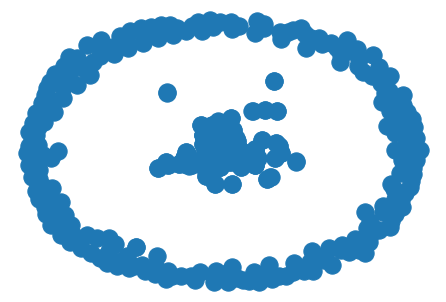

In [79]:
import matplotlib.pyplot as plt

G_Align=nx.Graph()
elist = unique_xmap
G_Align.add_weighted_edges_from(elist)
nx.draw(G_Align)
plt.show()

## compare node and edge connectivity
## compute largest connected component

In [80]:
print('Aligned graph have ',G_Align.number_of_nodes(),' nodes.')
print('Aligned graph have ',G_Align.number_of_edges(),' edges.')

Aligned graph have  623  nodes.
Aligned graph have  1417  edges.


In [81]:
print('Target graph have ',G_target_na.number_of_nodes(),' nodes.')
print('Target graph have ',G_target_na.number_of_edges(), ' edges.')

Target graph have  623  nodes.
Target graph have  1760  edges.


In [82]:
sum_weight=0
for i in range(len(unique_xmap)):
    sum_weight=sum_weight+ unique_xmap[i][2]
total_weight=0    
for i in range(len(nd1)):
    for j in range(len(nd2)):
        temp=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
        if(temp!=None):
            total_weight=total_weight+int(list(temp.values())[0])
print('Maximum Weight in Aligned graph: ',sum_weight) 
print('Total Weight in Target: ',total_weight)

Maximum Weight in Aligned graph:  994424
Total Weight in Target:  1084644


In [83]:
# returns number of different connected components 
print('number of different connected components in Aligned graph: ',nx.number_connected_components(G_Align)) 
print('number of different connected components in Target graph: ',nx.number_connected_components(G_target_na))  

number of different connected components in Aligned graph:  289
number of different connected components in Target graph:  288


In [84]:
# returns list of nodes in different connected components 
cc_align=list(nx.connected_components(G_Align))
cc_target=list(nx.connected_components(G_target_na))
print(list(nx.connected_components(G_Align))) 
print(list(nx.connected_components(G_target_na)))

[{'mm6374', 'mm1305', 'mm28', 'mm3243', 'mm14063', 'mm1162', 'mm592', 'mm17712', 'mm1150', 'mm2123', 'mm1225', 'mm1612', 'mm303', 'mm2895', 'mm6549', 'mm1877', 'mm988', 'mm8699', 'mm1377', 'mm5688', 'mm4686', 'mm6584', 'mm343', 'mm377', 'mm14262', 'mm2388', 'mm5397', 'mm11480', 'mm1347', 'mm304', 'mm3405', 'mm115', 'mm2545', 'mm2454', 'mm3367', 'mm6435', 'mm1953', 'mm657', 'mm11476', 'mm2048', 'mm3741', 'mm1837', 'mm603', 'mm3698', 'mm5183', 'mm3398', 'mm19306', 'mm16876', 'mm1295', 'mm765', 'mm14346', 'mm2301', 'mm1051', 'mm5486', 'mm126', 'mm7887', 'mm231', 'mm9133', 'mm8967', 'mm17438', 'mm11354', 'mm7826', 'mm6603', 'mm3821', 'mm2232', 'mm2317', 'mm2956', 'mm2709', 'mm2398', 'mm7617', 'mm2880', 'mm14191', 'mm5518', 'mm7088', 'mm6851', 'mm4294', 'mm271', 'mm14492', 'mm1672', 'mm6369', 'mm6497', 'mm1012', 'mm5726', 'mm2182', 'mm11666', 'mm15570', 'mm831', 'mm2999', 'mm5678', 'mm4064', 'mm5831', 'mm5422', 'mm12658', 'mm45', 'mm504', 'mm11243', 'mm2300', 'mm665', 'mm20845', 'mm5807', '

In [85]:
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G_Align)) 
print(nx.node_connectivity(G_target_na))
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G_Align))
print(nx.edge_connectivity(G_target_na))

0
0
0
0


## check similarity of connected components

In [86]:
count=0
for i in range(len(cc_align)):
    for j in range(len(cc_target)):
        if(cc_align[i]==cc_target[j]):
            count=count+1
print(count)

287


In [89]:
Gc = max(nx.connected_components(G_Align), key=len)
print('Largest common connected graph in Aligned graph: ',len(Gc))
Gct = max(nx.connected_components(G_target_na), key=len)
print('Largest common connected graph in Target graph: ',len(Gct))

Largest common connected graph in Aligned graph:  144
Largest common connected graph in Target graph:  155


### check for mistake align

In [90]:
for i in range(len(unique_xmap)):
    if (G_target_na.has_edge(unique_xmap[i][0], unique_xmap[i][1])==False):
        print(unique_xmap[i])
        print(i)
print('no exist error')    

no exist error


# draw graphs

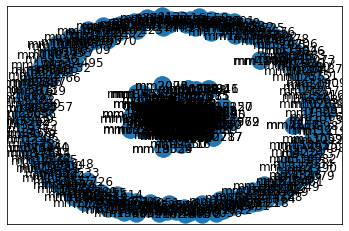

In [91]:
nx.draw_networkx(G1, with_labels = True)

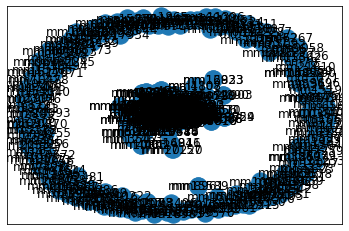

In [92]:
nx.draw_networkx(G2)

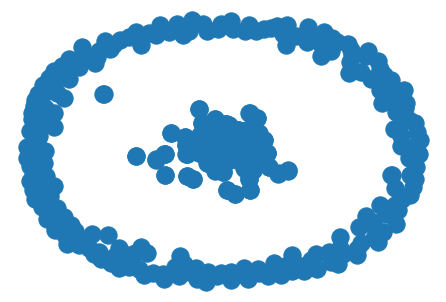

In [93]:
import matplotlib.pyplot as plt
nx.draw(G_target_na)
plt.show()

In [94]:
# total ec
total_ec=G_target_na.number_of_edges()/G1.number_of_edges()*100
ratio_ec=score_ec_temp/total_ec*100
print("total EC: ",total_ec)
print("ratio EC: ",ratio_ec)

total EC:  100.0
ratio EC:  106.98863636363636


In [95]:
# total ics
total_ics=G_target_na.number_of_edges()/count_induced*100
ratio_ics=score_ics_temp/total_ics*100
print("total ICS: ",total_ics)
print("ratio ICS: ",ratio_ics)

total ICS:  100.0
ratio ICS:  106.98863636363636


In [96]:
# total s3
total_s3=(G_target_na.number_of_edges()/(G1.number_of_edges()+count_induced-G_target_na.number_of_edges()))*100
ratio_s3=score_s3_temp/total_s3*100
print("total S3: ",total_s3)
print("ratio S3: ",ratio_s3)

total S3:  100.0
ratio S3:  115.02748930971289


# compute FC

In [97]:
import pickle
with open('mm-mm-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

In [98]:
tree=[[unique_xmap[i][0],unique_xmap[i][1]] for i in range(len(unique_xmap))]
tree

[['mm2182', 'mm2232'],
 ['mm926', 'mm926'],
 ['mm6851', 'mm2398'],
 ['mm8252', 'mm9240'],
 ['mm17071', 'mm16191'],
 ['mm8183', 'mm8460'],
 ['mm1596', 'mm478'],
 ['mm2827', 'mm2827'],
 ['mm6564', 'mm7088'],
 ['mm5505', 'mm5505'],
 ['mm334', 'mm1435'],
 ['mm14316', 'mm9550'],
 ['mm960', 'mm5091'],
 ['mm6562', 'mm5486'],
 ['mm11666', 'mm9407'],
 ['mm19559', 'mm18024'],
 ['mm1051', 'mm1051'],
 ['mm7123', 'mm7123'],
 ['mm3405', 'mm3405'],
 ['mm9309', 'mm9669'],
 ['mm3732', 'mm3732'],
 ['mm20200', 'mm20200'],
 ['mm3178', 'mm5042'],
 ['mm3698', 'mm831'],
 ['mm15950', 'mm15950'],
 ['mm638', 'mm2150'],
 ['mm17882', 'mm3314'],
 ['mm2999', 'mm17223'],
 ['mm343', 'mm3872'],
 ['mm15713', 'mm19079'],
 ['mm2348', 'mm3022'],
 ['mm6126', 'mm6126'],
 ['mm6309', 'mm1993'],
 ['mm5486', 'mm6497'],
 ['mm9211', 'mm9211'],
 ['mm1226', 'mm1225'],
 ['mm2454', 'mm2454'],
 ['mm18508', 'mm18508'],
 ['mm8533', 'mm8183'],
 ['mm508', 'mm123'],
 ['mm3362', 'mm5042'],
 ['mm1837', 'mm115'],
 ['mm8390', 'mm9669'],
 ['mm7

# load ontology and create DAG graph

In [99]:
import pandas as pd
f=open('go.dag.obo.txt').readlines()
df=pd.DataFrame(f)
df

,0
0,GO:0046431 GO:0019599\n
1,GO:0046430 GO:0019595\n
2,GO:0046432 GO:0019361\n
3,GO:0034198 GO:0060733\n
4,GO:0046343 GO:0019872\n
...,...
11309,GO:0019194 GO:0022871\n
11310,GO:0019198 GO:0005001\n
11311,GO:0019199 GO:0004675 GO:0004714 GO:0009784\n
11312,GO:0070255 GO:0070256 GO:0070257\n


In [100]:
# preprocessing
dag_list=[]
for i in range(len(df[0])):
    m1=str(df[0][i])
    m1=m1.replace('GO:','')
    m1=m1.replace('\n','')
    s=m1.split(' ')
    dag_list.append(s)
dag_list

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658', '0030853', '0045643', '0030854', '0045640'],
 ['0030853', '0045659', '0045644', '0045641'],
 ['0030851', '0030221', '0030223', '0030222'],
 ['0030856',
  '0003339',
  '0030860',
  '0045601',
  '0030857',
  '0072182',
  '0030858',
  '0045616'],
 ['0030857', '0045602', '0030861', '0045617', '0072183'],
 ['0030854', '0045645', '0045642', '0045660'],
 ['0030855',
  '0030859',
  '0030216',
  '0072192',
  '0060671',
  '0072160',
  '0060742',
  '0035026',
  '0072311',
  '0060487',
  '0045446',
  '0060644',
  '0002065'],
 ['0030858', '0045603', '0030862', '0045618'],
 ['0030859', '0045198'],
 ['0031106', '0032186'],
 ['0031105', '0032151', '0032152'],
 ['0031103', '0014814', '0048673', '0014012'],
 ['0031102', '00

In [101]:
dag_nd=[]
for i in range(len(dag_list)):
    for j in range(len(dag_list[i])):
        dag_nd.append(dag_list[i][j])
dag_nodes=set(dag_nd)
print(dag_nodes)
print(len(dag_nodes))

{'0008202', '0000346', '0052308', '0046502', '0015159', '0032693', '0042930', '0071574', '0009682', '0006290', '0034246', '0043777', '0034926', '0010847', '0021956', '0015445', '0007039', '0010911', '0010657', '0007194', '0050119', '0015446', '0090117', '0043990', '0050831', '0043189', '0009225', '0035312', '0060316', '0007083', '0044167', '0075056', '0004838', '0035163', '0046947', '0070043', '0033640', '0050609', '0072163', '0070294', '0006635', '0002008', '0004032', '0000035', '0071724', '0043568', '0034116', '0072245', '0044316', '0043501', '0035090', '0032686', '0045482', '0018214', '0016460', '0046829', '0008204', '0031146', '0004088', '0043323', '0032539', '0019360', '0030322', '0006621', '0000237', '0070248', '0080059', '0000165', '0046294', '0018537', '0048737', '0071245', '0007355', '0050502', '0003303', '0014037', '0001743', '0035471', '0015789', '0045471', '0022876', '0060586', '0030917', '0048212', '0018377', '0022002', '0070537', '0048303', '0043607', '0048399', '0070377'

In [102]:
# create dag edges
dag_edges=[]
for i in range(len(dag_list)):
    for j in range(1,len(dag_list[i])):
        ed=[dag_list[i][0],dag_list[i][j]]
        dag_edges.append(ed)
dag_edges

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632'],
 ['0046437', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658'],
 ['0030852', '0030853'],
 ['0030852', '0045643'],
 ['0030852', '0030854'],
 ['0030852', '0045640'],
 ['0030853', '0045659'],
 ['0030853', '0045644'],
 ['0030853', '0045641'],
 ['0030851', '0030221'],
 ['0030851', '0030223'],
 ['0030851', '0030222'],
 ['0030856', '0003339'],
 ['0030856', '0030860'],
 ['0030856', '0045601'],
 ['0030856', '0030857'],
 ['0030856', '0072182'],
 ['0030856', '0030858'],
 ['0030856', '0045616'],
 ['0030857', '0045602'],
 ['0030857', '0030861'],
 ['0030857', '0045617'],
 ['0030857', '0072183'],
 ['0030854', '0045645'],
 ['0030854', '0045642'],
 ['0030854', '0045660'],
 ['0030855', '0030859'],
 ['0030855', '0030216'],
 ['0030855', '0072192'],
 ['0030855', '0060671'],


In [103]:
import networkx as nx
go=nx.DiGraph()
go.add_nodes_from(dag_nodes)
go.add_edges_from(dag_edges)
go

In [104]:
c=0
import numpy as np
na=tree
for i in range(len(tree)):
    for j in range(2):
        if ('sc' in tree[i][j] or 'mm' in tree[i][j]):
            s=tree[i][j][2:]
            x='0'*(7-len(s))
            y=x+s
            #print(y)
            na[i][j]=y
            c=c+1
print(len(tree),c)
print(len(na))

1883 3766
1883


In [105]:
fc=[]
for i in range(len(na)):
    if na[i][0] in dag_nodes:
        e=go.predecessors(na[i][0])
        if na[i][1] in dag_nodes: 
            f=go.predecessors(na[i][1])
            temp=[]
            for key in e:
                temp.append(key)
            for key in f:
                temp.append(key)
            # compute intersection/union 
            fc.append(sum([temp.count(temp[z])/len(temp) for z in range(len(temp))]))
        else:
            fc.append(0)
#print(fc)
# compute average of all fc 
func=np.average(fc)
print('functional coherence:',func)

functional coherence: 1.1208510638297873


In [ ]:
#FC is 1 means that 100%